Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 3.845401188473625, 'gamma': 0.10507143064099161, 'kernel': 'rbf'}
Accuracy: 98.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       205
           1       0.98      0.99      0.98       205

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410

Confusion Matrix:
[[200   5]
 [  3 202]]


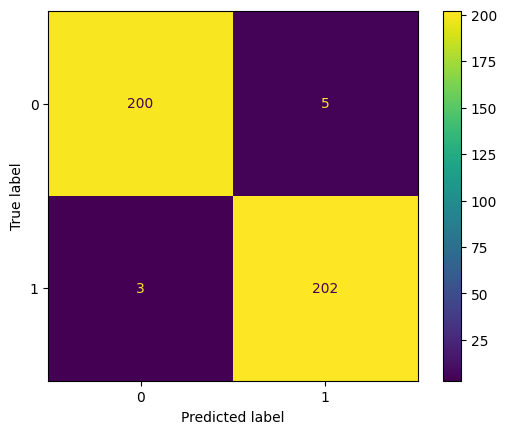

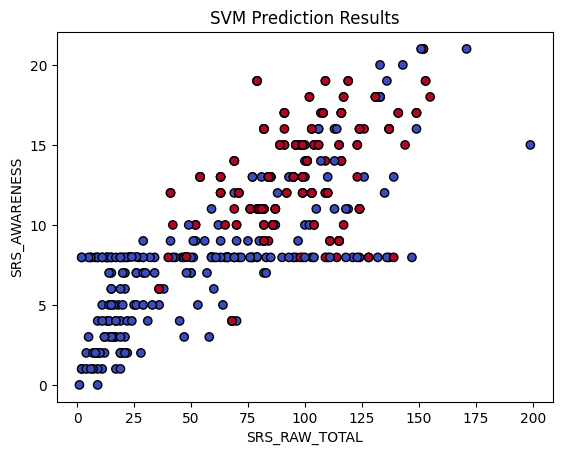

['best_svm_model.pkl']

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from scipy.stats import uniform

Dataset = "../input/srsno-avg2"
training_df = pd.read_csv(Dataset + "/MLsheet - SRSno-avg.csv")

srs_scores = ['SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION', 'SRS_MOTIVATION', 'SRS_MANNERISMS']

filtered_df = training_df.dropna(subset=srs_scores + ['HAS ADHD'])

X = filtered_df[srs_scores]
y = filtered_df['HAS ADHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(probability=True)

# parameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and 10
    'gamma': uniform(0.01, 0.1),  # Uniform distribution between 0.01 and 0.1
    'kernel': ['rbf', 'sigmoid']
}

random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print  best parameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate  model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolors='k')
plt.title("SVM Prediction Results")
plt.xlabel("SRS_RAW_TOTAL")
plt.ylabel("SRS_AWARENESS")
plt.show()

joblib.dump(best_model, 'best_svm_model.pkl')
